<a href="https://colab.research.google.com/github/A-Aishu/SCS4305-Python-Programming-and-Machine-Learning-Lab-cycles/blob/main/38120008_Aishwarya_Cycle_3_Exercise_19_Understanding_the_Data_Set_(Twitter).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***SCS4305 - Python Programming and Machine Learning Lab***

**Cycle 3_Exercise 19_Understanding the Data Set (Twitter)**

**38120008_AISHWARYA R**

**Requirement:**

pandas, numpy, nltk, re, wordcloud, matplotlib, seaborn

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train (1).csv


In [ ]:
data=pd.read_csv('train.csv') 
def remove_pattern(input_txt, pattern):
 r = re.findall(pattern, input_txt)
 for i in r:
     input_txt = re.sub(i, '', input_txt) 
 return input_txt 
data['new'] = np.vectorize(remove_pattern)(data['tweet'], "@[\w]*")
data['new'] = data['new'].str.replace("[^a-zA-Z#]", " ")
data['new'] = data['new'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
tokenized_tweet = data['new'].apply(lambda x: x.split())


**importing WordCloud fromthe pkgs**


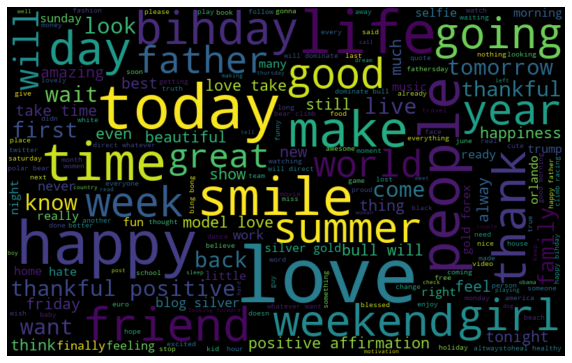

In [ ]:
import os
os.environ["PATH"] += os.pathsep + r'C:\ProgramData\Anaconda3\pkgs'
all_words = ' '.join([text for text in data['new']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

**Generate the word Cloud for the positive tweets**

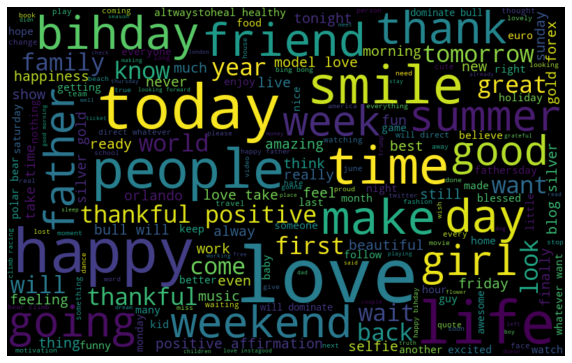

In [ ]:
positive_words = ' '.join([text for text in data['new'][data['label']==0]])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(positive_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()


**Generate the word Cloud for the negative tweets**

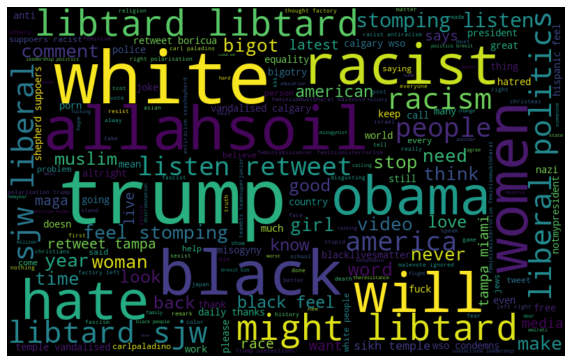

In [ ]:
negative_words = ' '.join([text for text in data['new'][data['label']==1]])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()
#%% funcion for extracting hashTag
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

**Display the frequency of Hash tags (both positive and negative tags)**

['run', 'lyft', 'disapointed', 'getthanked', 'model', 'motivation', 'allshowandnogo', 'school', 'exams', 'hate', 'imagine', 'actorslife', 'revolutionschool', 'girl', 'allin', 'cavs', 'champions', 'cleveland', 'clevelandcavaliers', 'ireland', 'blog', 'silver', 'gold', 'forex', 'orlando', 'standwithorlando', 'pulseshooting', 'orlandoshooting', 'biggerproblems', 'selfish', 'heabreaking', 'values', 'love', 'gettingfed', 'got', 'junior', 'yugyoem', 'omg', 'thankful', 'positive', 'friday', 'cookies', 'euro', 'badday', 'coneofshame', 'cats', 'pissed', 'funny', 'laughs', 'wine', 'weekend', 'tgif', 'gamedev', 'indiedev', 'indiegamedev', 'squad', 'upsideofflorida', 'shopalyssas', 'love', 'smiles', 'media', 'pressconference', 'antalya', 'turkey', 'throwback', 'ica', 'rip', 'orlando', 'alohafriday', 'time', 'not', 'exist', 'positivevibes', 'hawaiian', 'goodnight', 'badmonday', 'taylorswift', 'travelingram', 'dalat', 'ripinkylife', 'photoshop', 'enoughisenough', 'dontphotoshopeverything', 'wheresal

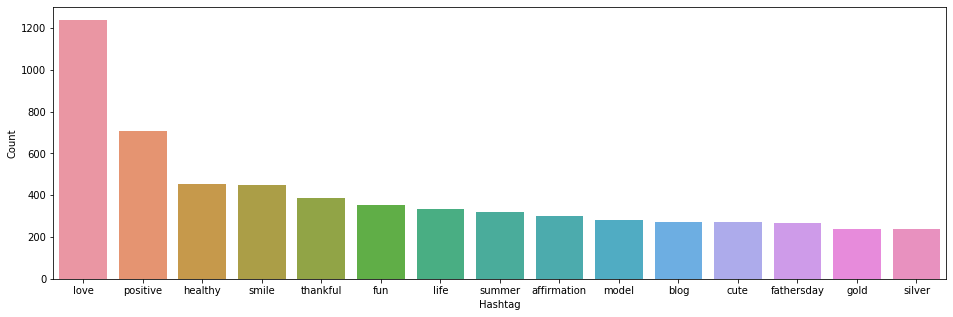

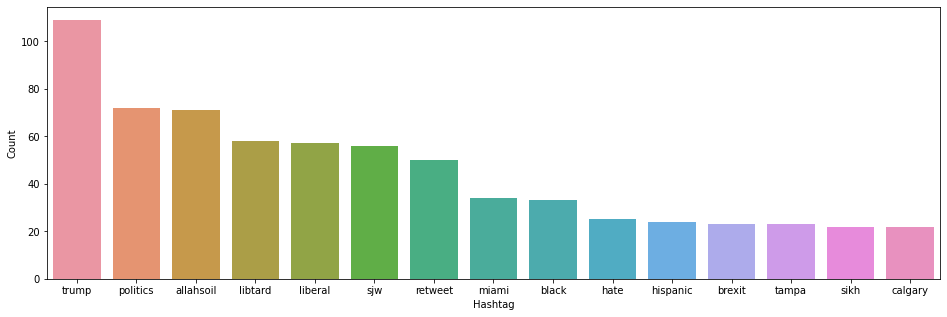

In [ ]:
HT_regular = hashtag_extract(data['new'][data['label'] == 0])

# extracting hashtags from racist/sexist tweets
HT_negative = hashtag_extract(data['new'][data['label'] == 1])

# unnesting list
HT_regular = sum(HT_regular,[])
HT_negative = sum(HT_negative,[])
print(HT_regular)
print(HT_negative)
#%% Plot the top 15 positive hash tags using the bar chart.
import nltk
import seaborn as sns
a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 15 most frequent hashtags     
d = d.nlargest(columns="Count", n = 15) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()
#%% Plot the top 15 negative hash tags using the bar chart.
import nltk
import seaborn as sns
b = nltk.FreqDist(HT_negative)
e = pd.DataFrame({'Hashtag': list(b.keys()), 'Count': list(b.values())})
# selecting top 15 most frequent hashtags
e = e.nlargest(columns="Count", n = 15)   
plt.figure(figsize=(16,5))
ax = sns.barplot(data=e, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

**Plot the top 15 positive and negative hash tags using the bar chart.**

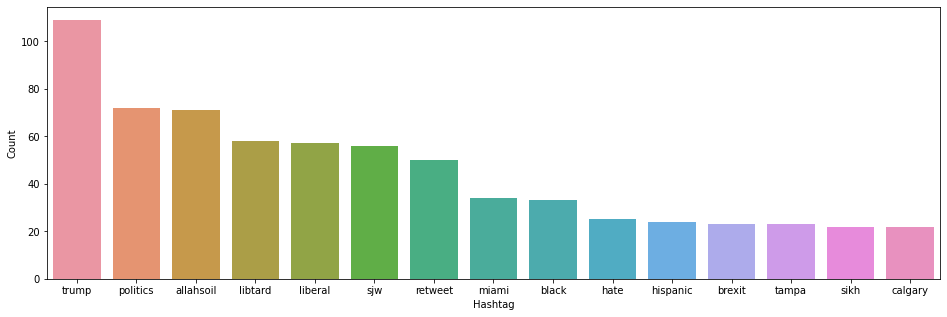

In [ ]:
import nltk
import seaborn as sns
b = nltk.FreqDist(HT_negative)
e = pd.DataFrame({'Hashtag': list(b.keys()), 'Count': list(b.values())})
# selecting top 15 most frequent hashtags
e = e.nlargest(columns="Count", n = 15)   
plt.figure(figsize=(16,5))
ax = sns.barplot(data=e, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

